# **DESAFIO 3 G2** 
# **Dataset Properati - Modelado de datos - Preliminar.**
---

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

Vacio

$\hspace{.5cm}$[Observaciones generales](#section_og)
  
$\hspace{.9cm}$[Dimension de propiedades](#section_tsv_gdp)

Vacio

$\hspace{.5cm}$[Expresiones regulares](#section_re)

$\hspace{.9cm}$[Principios generales](#section_re_pg)

Vacio

$\hspace{.5cm}$[Borrado de registros duplicados](#section_drd)

$\hspace{.5cm}$[Borrado de registros sin información completa](#section_drii)

Visualizaciones basicas

$\hspace{.5cm}$[Venta departamentos CABA](#section_v_1)

$\hspace{.5cm}$[Venta casas CABA, Buenos Aires e Interior](#section_v_4)


---

<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

Carga de DataFrame y exploracion inicial

In [2]:
import pandas as pd
import numpy as np
import re
import random

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_location = 'https://github.com/DHDSDesafios/DH_DS_desafio_2_properati/raw/master/data/properatid2caba.zip'
data = pd.read_csv(data_location, compression='zip', encoding="utf-8")

In [5]:
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_rows', 400)

<a id="section_og"></a> 
### Observaciones Generales

[volver a TOC](#section_toc)

In [6]:
data.sample(4)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,surface_total_in_m2,surface_covered_in_m2,cochera,piscina,parrilla,baulera,balcon,terraza,jardin,lavadero
22326,88598,apartment,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,"-34.5973922465,-58.3961431952",-34.597392,-58.396143,287000.0,USD,...,89.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19134,77169,apartment,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,"-34.605495,-58.4007076",-34.605495,-58.400708,105000.0,USD,...,86.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,18916,apartment,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.5620844,-58.4566864",-34.562084,-58.456686,280000.0,USD,...,98.0,90.0,1.0,NaN,NaN,NaN,balcon,NaN,NaN,NaN
1439,7994,apartment,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,"-34.6058091,-58.4534805",-34.605809,-58.453481,179300.0,USD,...,75.0,68.0,1.0,1.0,NaN,NaN,balcon,1.0,NaN,NaN


In [7]:
data.columns

Index(['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
       'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'floor', 'rooms',
       'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
       'Localidad', 'Obs_localidad', 'place_name', 'geonames_id',
       'price_usd_per_m2', 'price_per_m2', 'surface_total_in_m2',
       'surface_covered_in_m2', 'cochera', 'piscina', 'parrilla', 'baulera',
       'balcon', 'terraza', 'jardin', 'lavadero'],
      dtype='object')

In [8]:
data.shape

(29380, 36)

DEPURACION DE NULOS

In [9]:
caba_place_name_mask = data.place_name != 'Capital Federal'
surface_total_mask_notnull = data.surface_total_in_m2.notnull()
price_per_m2_mask_notnull = data.price_per_m2.notnull()
price_usd_per_m2_mask_notnull = data.price_usd_per_m2.notnull()

In [10]:
#data = data.loc[caba_place_name_mask & surface_covered_mask_notnull & price_per_m2_mask_notnull]
data = data.loc[caba_place_name_mask & surface_total_mask_notnull & price_usd_per_m2_mask_notnull]

In [11]:
data.shape

(21895, 36)

In [12]:
# crear variables dummies
property_type_dummies = pd.get_dummies(data.property_type, prefix='prop_type')

data = pd.concat([data, property_type_dummies], axis=1)

# imprimimos 5 filas cualquieras
data.sample(5)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,parrilla,baulera,balcon,terraza,jardin,lavadero,prop_type_PH,prop_type_apartment,prop_type_house,prop_type_store
19157,77243,PH,|Argentina|Capital Federal|Villa Pueyrredón|,Argentina,Capital Federal,"-34.585716,-58.5097384",-34.585716,-58.509738,128000.0,USD,...,NaN,NaN,balcon,1.0,NaN,1.0,1,0,0,0
18695,75672,apartment,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,"-34.6108896,-58.4139636",-34.610890,-58.413964,80520.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
2105,10548,apartment,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.5672925,-58.438092",-34.567293,-58.438092,740000.0,USD,...,NaN,1.0,1,1.0,1.0,NaN,0,1,0,0
16340,65372,apartment,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,NaN,NaN,NaN,360000.0,USD,...,NaN,1.0,1,NaN,NaN,NaN,0,1,0,0
1234,7465,apartment,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,"-34.583007,-58.420832",-34.583007,-58.420832,636297.0,USD,...,1.0,1.0,1,NaN,NaN,NaN,0,1,0,0


In [13]:
# crear variables dummies
place_name_dummies = pd.get_dummies(data.place_name, prefix='pn')

data = pd.concat([data, place_name_dummies], axis=1)

# imprimimos 5 filas cualquieras
data.sample(5)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
5842,25788,apartment,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,"-34.5902121,-58.423941",-34.590212,-58.423941,200000.0,USD,...,0,0,0,0,0,0,0,0,0,0
13678,55911,apartment,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,"-34.6244303,-58.3741828",-34.624430,-58.374183,135879.0,USD,...,0,0,0,0,0,0,0,0,0,0
17872,73467,apartment,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,NaN,NaN,NaN,235000.0,USD,...,0,0,0,0,0,0,0,0,0,0
6435,26614,apartment,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,"-34.623965,-58.4162375",-34.623965,-58.416238,567900.0,USD,...,0,0,0,0,0,0,0,0,0,0
25546,106640,apartment,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,NaN,NaN,NaN,355953.0,USD,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.shape

(21895, 101)

In [15]:
print(data.cochera.apply(lambda x: type(x)).value_counts())
print(data.piscina.apply(lambda x: type(x)).value_counts())
print(data.parrilla.apply(lambda x: type(x)).value_counts())
print(data.balcon.apply(lambda x: type(x)).value_counts())
print(data.terraza.apply(lambda x: type(x)).value_counts())
print(data.lavadero.apply(lambda x: type(x)).value_counts())
print(data.lavadero.apply(lambda x: type(x)).value_counts())
print(data.surface_covered_in_m2.apply(lambda x: type(x)).value_counts())
print(data.surface_total_in_m2.apply(lambda x: type(x)).value_counts())

<class 'float'>    21895
Name: cochera, dtype: int64
<class 'float'>    21895
Name: piscina, dtype: int64
<class 'float'>    21895
Name: parrilla, dtype: int64
<class 'float'>    15039
<class 'str'>       6856
Name: balcon, dtype: int64
<class 'float'>    21895
Name: terraza, dtype: int64
<class 'float'>    21895
Name: lavadero, dtype: int64
<class 'float'>    21895
Name: lavadero, dtype: int64
<class 'float'>    21895
Name: surface_covered_in_m2, dtype: int64
<class 'float'>    21895
Name: surface_total_in_m2, dtype: int64


In [16]:
data.loc[data.cochera.isnull(), 'cochera'] = 0
data.cochera.astype('uint8')

data.loc[data.piscina.isnull(), 'piscina'] = 0
data.piscina.astype('uint8')

data.loc[data.lavadero.isnull(), 'lavadero'] = 0
data.lavadero.astype('uint8')

data.loc[data.parrilla.isnull(), 'parrilla'] = 0
data.parrilla.astype('uint8')

data.loc[data.terraza.isnull(), 'terraza'] = 0
data.terraza.astype('uint8')

data.loc[data.jardin.isnull(), 'jardin'] = 0
data.jardin.astype('uint8')

data.loc[data.balcon == 'Balcon', 'balcon'] = 1
data.loc[data.balcon == 'BALCON', 'balcon'] = 1
data.loc[data.balcon == 'balcon', 'balcon'] = 1
data.loc[data.balcon.isnull(), 'balcon'] = 0
data.balcon.astype('uint8')

data.loc[data.baulera.isnull(), 'baulera'] = 0
data.baulera.astype('uint8')

0        0
1        0
3        0
4        0
5        0
        ..
29375    0
29376    0
29377    1
29378    0
29379    0
Name: baulera, Length: 21895, dtype: uint8

Data frame a utilizar en los modelos de estimacion

In [17]:
erase_columns = ['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
       'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'floor', 'rooms',
       'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
       'Localidad', 'Obs_localidad', 'place_name']

In [18]:
data_d2 = data.drop(data[erase_columns], axis=1)

In [19]:
data_d2.columns

Index(['price_aprox_usd', 'geonames_id', 'price_usd_per_m2', 'price_per_m2',
       'surface_total_in_m2', 'surface_covered_in_m2', 'cochera', 'piscina',
       'parrilla', 'baulera', 'balcon', 'terraza', 'jardin', 'lavadero',
       'prop_type_PH', 'prop_type_apartment', 'prop_type_house',
       'prop_type_store', 'pn_Abasto', 'pn_Agronomía', 'pn_Almagro',
       'pn_Balvanera', 'pn_Barracas', 'pn_Barrio Norte', 'pn_Belgrano',
       'pn_Boca', 'pn_Boedo', 'pn_Caballito', 'pn_Catalinas',
       'pn_Centro / Microcentro', 'pn_Chacarita', 'pn_Coghlan',
       'pn_Colegiales', 'pn_Congreso', 'pn_Constitución', 'pn_Flores',
       'pn_Floresta', 'pn_Las Cañitas', 'pn_Liniers', 'pn_Mataderos',
       'pn_Monserrat', 'pn_Monte Castro', 'pn_Nuñez', 'pn_Once', 'pn_Palermo',
       'pn_Palermo Chico', 'pn_Palermo Hollywood', 'pn_Palermo Soho',
       'pn_Palermo Viejo', 'pn_Parque Avellaneda', 'pn_Parque Centenario',
       'pn_Parque Chacabuco', 'pn_Parque Chas', 'pn_Parque Patricios',
     

In [20]:
data_d2.sample(5)

,price_aprox_usd,geonames_id,price_usd_per_m2,price_per_m2,surface_total_in_m2,surface_covered_in_m2,cochera,piscina,parrilla,baulera,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
17951,126000.0,3430348.0,2680.85,3000.00,47.0,42.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4799,159000.0,3433775.0,1892.86,2523.81,84.0,63.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2436,520000.0,3435356.0,2241.38,2363.64,232.0,220.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
28118,269000.0,3436077.0,2514.02,2514.02,107.0,107.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
16163,157000.0,3429153.0,1744.44,2065.79,90.0,76.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_d2.shape

(21895, 79)

In [22]:
data_d2.loc[:, ['price_aprox_usd', 'price_usd_per_m2', 'surface_covered_in_m2', 'surface_total_in_m2', 'cochera', 'price_per_m2']].corr()

,price_aprox_usd,price_usd_per_m2,surface_covered_in_m2,surface_total_in_m2,cochera,price_per_m2
price_aprox_usd,1.000000,0.302166,0.533039,0.688091,0.123152,0.179876
price_usd_per_m2,0.302166,1.000000,-0.045287,-0.013623,-0.006962,0.534345
surface_covered_in_m2,0.533039,-0.045287,1.000000,0.955764,0.047292,-0.035868
surface_total_in_m2,0.688091,-0.013623,0.955764,1.000000,0.001979,-0.005299
cochera,0.123152,-0.006962,0.047292,0.001979,1.000000,0.002630
price_per_m2,0.179876,0.534345,-0.035868,-0.005299,0.002630,1.000000


In [23]:
#f, ax = plt.subplots(figsize=(7, 5))
#ax.heatmap(data.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap=sns.diverging_palette(20, 220, n=200), square=True)

#with sns.axes_style("white"):
#    f, ax = plt.subplots(figsize=(8, 8))
#    ax = sns.heatmap(data.corr(), vmax=.3, annot=True, square=True, cmap="YlGnBu")

In [24]:
feature_cols = ['cochera', 'prop_type_PH', 'prop_type_apartment', 'prop_type_house','prop_type_store', 'pn_Abasto', 'pn_Agronomía', 'pn_Almagro',
       'pn_Balvanera', 'pn_Barracas', 'pn_Barrio Norte', 'pn_Belgrano',
       'pn_Boca', 'pn_Boedo', 'pn_Caballito', 'pn_Catalinas',
       'pn_Centro / Microcentro', 'pn_Chacarita', 'pn_Coghlan',
       'pn_Colegiales', 'pn_Congreso', 'pn_Constitución', 'pn_Flores',
       'pn_Floresta', 'pn_Las Cañitas', 'pn_Liniers', 'pn_Mataderos',
       'pn_Monserrat', 'pn_Monte Castro', 'pn_Nuñez', 'pn_Once', 'pn_Palermo',
       'pn_Palermo Chico', 'pn_Palermo Hollywood', 'pn_Palermo Soho',
       'pn_Palermo Viejo', 'pn_Parque Avellaneda', 'pn_Parque Centenario',
       'pn_Parque Chacabuco', 'pn_Parque Chas', 'pn_Parque Patricios',
       'pn_Paternal', 'pn_Pompeya', 'pn_Puerto Madero', 'pn_Recoleta',
       'pn_Retiro', 'pn_Saavedra', 'pn_San Cristobal', 'pn_San Nicolás',
       'pn_San Telmo', 'pn_Tribunales', 'pn_Velez Sarsfield', 'pn_Versalles',
       'pn_Villa Crespo', 'pn_Villa Devoto', 'pn_Villa General Mitre',
       'pn_Villa Lugano', 'pn_Villa Luro', 'pn_Villa Ortuzar',
       'pn_Villa Pueyrredón', 'pn_Villa Real', 'pn_Villa Riachuelo',
       'pn_Villa Santa Rita', 'pn_Villa Soldati', 'pn_Villa Urquiza',
       'pn_Villa del Parque', 'surface_total_in_m2']

In [25]:
data_d2['surface_covered_in_m2'].isnull().value_counts()

False    21167
True       728
Name: surface_covered_in_m2, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [27]:
model = LinearRegression(fit_intercept=True) 

X = data_d2[feature_cols] 
y = data_d2.price_usd_per_m2
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1) 

model.fit(Xtrain, ytrain) 

ypred = model.predict(Xtest) 

print ('MAE:', mean_absolute_error(ytest, ypred).round(2)) 
print ('MSE:', mean_squared_error(ytest, ypred).round(2)) 
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2)) 
print ('R2:', r2_score(ytest, ypred).round(2)) 

MAE: 1108.28
MSE: 7330655.84
RMSE: 2707.52
R2: 0.32


In [28]:
data.shape, data_d2.shape

((21895, 101), (21895, 79))

REVISION DE OUTLIERS

In [33]:
def remove_outlier(df_in, qt1, qt3, iqrout, col_name, mask1, var1, mask2=None, var2=None):
    '''
    Calculo de outliers

    Parameters
    ----------
    df_in : dataFrame
        dataFrame utilizado para extraer variables de filtro y mascaras.
    qt1, qt3: float
        Cuantil inferior y superior (0 a 1).
    iqrout: float
        Margen exterior a iqr (1.5 o 3 recomendado)
    var1, var2: str
        Nombre de columnas de dataFrame ingresado como parametro para aplicar filtro sobre los datos.
    mask1, mask2: str
        Valores para utilizar con las columnas de filtro para generar mascaras booleanas.
    col_name: str
        Variable a aplicar los outliers.
    
    Output
    ------
    dataFrame filtrado por parametros con los outliers aplicados.

    Example
    ----------
    remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', 'Belgrano', 'place_name', 'PH', 'property_type')
    
    '''
    
    if (mask2 is None and var2 is not None) | (mask2 is not None and var2 is None):
        return 'you must set second mask with second variable'
    elif mask2 is None and var2 is None:
        var_mask = df_in[var1] == mask1
    else:
        var_mask = (df_in[var1] == mask1) & (df_in[var2] == mask2)
        
    q1 = df_in.loc[var_mask, col_name].quantile(qt1)
    q3 = df_in.loc[var_mask, col_name].quantile(qt3)
    
    iqr = q3-q1 #Interquartile range
    
    fence_low  = q1-iqrout*iqr
    fence_high = q3+iqrout*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high) & var_mask]
    
    return df_out

In [32]:
df_final = pd.DataFrame()
place_name_list = data.place_name.unique()
prop_type_list = data.property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

In [34]:
df_final = pd.DataFrame()
place_name_list = data.place_name.unique()
prop_type_list = data.property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'surface_total_in_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

In [35]:
df_final = pd.DataFrame()
place_name_list = data.place_name.unique()
prop_type_list = data.property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'surface_covered_in_m2', pn, 'place_name', pt, 'property_type')
        df_final = df_final.append(df_temp)

In [36]:
df_final.shape

(19790, 101)

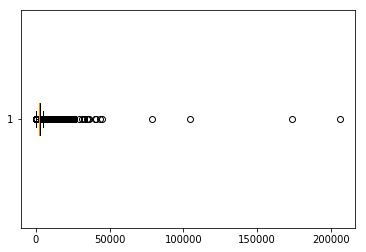

In [37]:
plt.boxplot(df_final["price_usd_per_m2"], vert = False)
plt.show()

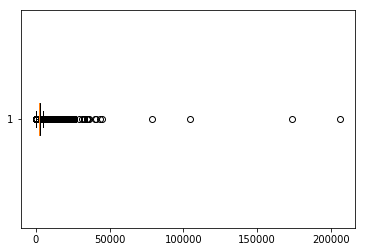

In [38]:
plt.boxplot(data["price_usd_per_m2"], vert = False)
plt.show()

In [53]:
# variable price_per_m2 SIN calculo de outliers
data.price_usd_per_m2.max(), data.price_usd_per_m2.min()

(206333.33, 13.8)

In [54]:
# variable price_per_m2 CON calculo de outliers
df_final.price_usd_per_m2.max(), df_final.price_usd_per_m2.min()

(34608.0, 13.8)